In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import csv
import pickle

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Data Loading**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Information***
This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure  in the ionosphere.  "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number.  There were 17 pulse numbers for the Goose Bay system.  Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

In [30]:
dataSet = 'ionosphere'
filePath = '/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/'+dataSet+'.csv'
data = pd.read_csv(filePath)
data

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [32]:
file = data
print("\nOriginal file:")
print(file)

# adding header
headerList = ['Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6', 
             'Column_7', 'Column_8', 'Column_9', 'Column_10', 'Column_11', 'Column_12', 
             'Column_13', 'Column_14', 'Column_15', 'Column_16', 'Column_17', 'Column_18', 
             'Column_19', 'Column_20', 'Column_21', 'Column_22', 'Column_23', 'Column_24', 
             'Column_25', 'Column_26', 'Column_27', 'Column_28', 'Column_29', 'Column_30', 
             'Column_31', 'Column_32', 'Column_33', 'Column_34', 'Column_35']

# converting data frame to csv
file.to_csv("gfg2.csv", header=headerList, index=False)

# display modified csv file
file2 = pd.read_csv("gfg2.csv")
print('\nModified file:')
print(file2)


Original file:
     1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0    1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1    1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2    1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3    1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4    1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   
..  .. ..      ...       ...      ...      ...      ...       ...      ...   
345  1  0  0.83508   0.08298  0.73739 -0.14706  0.84349  -0.05567  0.90441   
346  1  0  0.95113   0.00419  0.95183 -0.02723  0.93438  -0.01920  0.94590   
347  1  0  0.94701  -0.00034  0.93207 -0.03227  0.95177  -0.03431  0.95584   
348  1  0  0.90608  -0.01657  0.98122 -0.01989  0.95691  -0.03646  0.85746   
349  1  0  0.84710   0.13533  0.73638 -0.06151  0.87873   0.08260  0.88928   

     0.03760  ...  -0.51171  0.41078  -0.46168 

In [33]:
file2

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [35]:
for i in range(len(file2)):
  if file2.iloc[i,34]=='b':
    file2.iloc[i,34] = 0.0
  else:
    file2.iloc[i,34] = 1.0
file2

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1.0
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1.0
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1.0
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1.0
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1.0
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1.0
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1.0
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1.0


In [36]:
data = file2

In [10]:
data = data.replace(np.nan,0.0)


In [11]:
data.shape

(350, 35)

In [12]:
data.iloc[3,19]

-0.17813

In [13]:
from random import shuffle
train, test= train_test_split(data, test_size=0.2, shuffle=True, random_state=42)
print(train.shape,test.shape)

(280, 35) (70, 35)


In [14]:
train.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
228,1,0,0.73523,-0.38293,0.80151,0.10278,0.78826,0.15266,0.55580,0.05252,...,0.57549,0.44174,0.48200,0.12473,1.00000,0.35070,0.49721,0.30588,0.49831,1.0
78,0,0,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,0.0
90,1,0,0.84557,-0.08580,-0.31745,-0.80553,-0.08961,-0.56435,0.80648,0.04576,...,-0.03718,0.70882,-0.25288,0.77884,-0.14109,-0.21354,-0.78170,-0.18494,-0.59867,0.0
16,0,0,0.00000,0.00000,-1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,0.0
66,0,0,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,...,-1.00000,1.00000,-1.00000,1.00000,0.65625,0.00000,0.00000,1.00000,-1.00000,0.0


In [15]:
features=train.columns[0:-1]
Score=[]
features

Index(['Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6',
       'Column_7', 'Column_8', 'Column_9', 'Column_10', 'Column_11',
       'Column_12', 'Column_13', 'Column_14', 'Column_15', 'Column_16',
       'Column_17', 'Column_18', 'Column_19', 'Column_20', 'Column_21',
       'Column_22', 'Column_23', 'Column_24', 'Column_25', 'Column_26',
       'Column_27', 'Column_28', 'Column_29', 'Column_30', 'Column_31',
       'Column_32', 'Column_33', 'Column_34'],
      dtype='object')

In [16]:
X = data[features]
y = data['Column_35']
X.shape

(350, 34)

# **Data Split (Major and Minor)**

In [17]:
for(Column_35), group in train.groupby(['Column_35']):
  group.to_csv(f'{Column_35}.csv', index=False)
# print(pd.read_csv("0.0.csv"))
# print(pd.read_csv("1.0.csv"))
train_zero = pd.read_csv("0.0.csv")
train_one = pd.read_csv("1.0.csv")
train_zero

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,0,0,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,0.0
1,1,0,0.84557,-0.08580,-0.31745,-0.80553,-0.08961,-0.56435,0.80648,0.04576,...,-0.03718,0.70882,-0.25288,0.77884,-0.14109,-0.21354,-0.78170,-0.18494,-0.59867,0.0
2,0,0,0.00000,0.00000,-1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,0.0
3,0,0,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,...,-1.00000,1.00000,-1.00000,1.00000,0.65625,0.00000,0.00000,1.00000,-1.00000,0.0
4,1,0,-0.26667,0.40000,-0.27303,0.12159,-0.17778,-0.04444,0.06192,-0.06879,...,-0.00050,0.00019,-0.00043,0.00026,0.00005,0.00000,0.00015,-0.00008,0.00002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,-0.20500,0.28750,0.23000,0.10000,0.28250,0.31750,0.32250,0.35000,...,-0.24000,0.32190,-0.28475,-0.47000,0.18500,-0.27104,-0.31228,0.40445,0.03050,0.0
96,1,0,0.05866,-0.00838,0.06704,0.00838,0.00000,-0.01117,0.00559,-0.03911,...,0.00559,0.10335,-0.00838,0.03073,-0.00279,0.04469,0.00000,0.04749,-0.03352,0.0
97,1,0,1.00000,-1.00000,0.00000,0.00000,0.77941,-0.99265,0.80882,0.55147,...,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.0
98,1,0,0.73810,0.83333,-0.76190,-0.23810,0.33333,-0.14286,0.45238,-0.14286,...,-0.10234,0.24889,-0.51079,1.00000,0.00000,-0.66667,-0.04762,0.26190,0.02381,0.0


In [18]:
train_one

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,1,0,0.73523,-0.38293,0.80151,0.10278,0.78826,0.15266,0.55580,0.05252,...,0.57549,0.44174,0.48200,0.12473,1.00000,0.35070,0.49721,0.30588,0.49831,1.0
1,1,0,0.87111,0.04326,0.79946,0.18297,0.99009,0.29292,0.89455,-0.08337,...,-0.09193,0.85967,-0.02908,0.78774,-0.04101,0.75935,0.21812,0.88238,0.09193,1.0
2,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,1.0
3,1,0,0.86284,0.19310,0.80920,0.41149,0.67203,0.55785,0.54559,0.69962,...,0.25747,-0.63038,0.08818,-0.57241,-0.07816,-0.54866,-0.19923,-0.42912,-0.31954,1.0
4,1,0,1.00000,0.09091,0.95455,-0.09091,0.77273,0.00000,1.00000,0.00000,...,0.04545,0.91541,0.02897,0.95455,0.09091,0.86364,-0.09091,0.86364,0.04545,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,0,0.96087,0.08620,0.96760,0.19279,0.96026,0.27451,0.98044,0.35052,...,0.74689,0.33401,0.83796,0.24944,0.86061,0.13756,0.86835,0.09048,0.86285,1.0
176,1,0,0.99449,0.00526,0.84082,-0.11313,0.88237,-0.16431,0.99061,-0.06257,...,-0.19872,0.87579,-0.17806,0.94294,-0.16581,0.80253,-0.25741,0.76586,-0.27794,1.0
177,1,0,0.47938,-0.12371,0.42784,-0.12371,0.70103,-0.39175,0.73196,0.07216,...,0.19588,0.53396,-0.12447,0.15464,-0.26289,0.47423,0.04124,0.45361,-0.51546,1.0
178,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1.0


In [19]:
train_zero.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/train_zero.csv')
train_one.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/train_one.csv')


In [20]:
major_class = train_one
minor_class = train_zero

In [21]:
# before scaling the min and max values for both alcohol and malic acid are different 

minor_class.describe().T  


,count,mean,std,min,25%,50%,75%,max
Column_1,100.0,0.690000,0.464823,0.0,0.000000,1.000000,1.000000,1.0
Column_2,100.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Column_3,100.0,0.278743,0.660565,-1.0,0.000000,0.212520,1.000000,1.0
Column_4,100.0,-0.063356,0.646501,-1.0,-0.510525,0.000000,0.155793,1.0
Column_5,100.0,0.238774,0.693675,-1.0,0.000000,0.000000,1.000000,1.0
Column_6,100.0,-0.003546,0.646028,-1.0,-0.232527,0.000000,0.170030,1.0
Column_7,100.0,0.239334,0.626908,-1.0,0.000000,0.000000,0.985143,1.0
Column_8,100.0,-0.075857,0.661983,-1.0,-0.723325,0.000000,0.064732,1.0
Column_9,100.0,0.338802,0.591823,-1.0,0.000000,0.312855,0.997818,1.0
Column_10,100.0,0.119132,0.603540,-1.0,-0.061345,0.000000,0.517362,1.0


In [22]:
major_class.describe().T

,count,mean,std,min,25%,50%,75%,max
Column_1,180.0,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.0
Column_2,180.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
Column_3,180.0,0.834530,0.192941,0.25000,0.747685,0.901315,0.994980,1.0
Column_4,180.0,0.086309,0.236857,-0.92453,-0.015777,0.043365,0.191142,1.0
Column_5,180.0,0.801334,0.204771,0.06213,0.666567,0.855840,0.993548,1.0
Column_6,180.0,0.171461,0.303323,-0.78509,-0.023300,0.037440,0.344095,1.0
Column_7,180.0,0.720913,0.284101,-0.22222,0.528485,0.808735,0.960550,1.0
Column_8,180.0,0.209854,0.368682,-0.87052,-0.018097,0.049585,0.417290,1.0
Column_9,180.0,0.626182,0.400807,-0.55941,0.455815,0.785045,0.946227,1.0
Column_10,180.0,0.234816,0.375954,-0.51171,-0.018440,0.057780,0.539725,1.0


# **Auto Encoder**

In [23]:
import keras
from keras import layers

# This is the size of our encoded representations
n = len(data.iloc[0]) - 1
encoding_dim = n  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(n,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=None)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(n, activation=None)(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [24]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense (Dense)               (None, 34)                1190      
                                                                 
 dense_1 (Dense)             (None, 34)                1190      
                                                                 
Total params: 2,380
Trainable params: 2,380
Non-trainable params: 0
_________________________________________________________________


In [25]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [26]:
autoencoder.compile(optimizer='adam', loss='mse')

In [37]:
x_train = minor_class[features]
x_test = major_class[features]
y_train = minor_class['Column_35']
y_test = major_class['Column_35']

# **Data Scaling**

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()    # create an object of class

scaler.fit(x_train)       #  fit on training i/p data
x_train_scaled = scaler.transform(x_train)    # transform model on both traing and testing data

scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)


In [39]:
# convert the numpy array after transform into a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)
#x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)


In [40]:
x_train.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/x_train.csv')
x_test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/x_test.csv')
x_train_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/x_train_scaled.csv')
x_test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/x_test_scaled.csv')


In [41]:
x_train.shape

(100, 34)

In [42]:
x_test.shape

(180, 34)

In [43]:
x_train

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
0,0,0,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000
1,1,0,0.84557,-0.08580,-0.31745,-0.80553,-0.08961,-0.56435,0.80648,0.04576,...,0.78932,-0.03718,0.70882,-0.25288,0.77884,-0.14109,-0.21354,-0.78170,-0.18494,-0.59867
2,0,0,0.00000,0.00000,-1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000
3,0,0,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,...,1.00000,-1.00000,1.00000,-1.00000,1.00000,0.65625,0.00000,0.00000,1.00000,-1.00000
4,1,0,-0.26667,0.40000,-0.27303,0.12159,-0.17778,-0.04444,0.06192,-0.06879,...,-0.00069,-0.00050,0.00019,-0.00043,0.00026,0.00005,0.00000,0.00015,-0.00008,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,-0.20500,0.28750,0.23000,0.10000,0.28250,0.31750,0.32250,0.35000,...,-0.58000,-0.24000,0.32190,-0.28475,-0.47000,0.18500,-0.27104,-0.31228,0.40445,0.03050
96,1,0,0.05866,-0.00838,0.06704,0.00838,0.00000,-0.01117,0.00559,-0.03911,...,0.00838,0.00559,0.10335,-0.00838,0.03073,-0.00279,0.04469,0.00000,0.04749,-0.03352
97,1,0,1.00000,-1.00000,0.00000,0.00000,0.77941,-0.99265,0.80882,0.55147,...,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000
98,1,0,0.73810,0.83333,-0.76190,-0.23810,0.33333,-0.14286,0.45238,-0.14286,...,-0.57255,-0.10234,0.24889,-0.51079,1.00000,0.00000,-0.66667,-0.04762,0.26190,0.02381


In [44]:
x_test

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
0,1,0,0.73523,-0.38293,0.80151,0.10278,0.78826,0.15266,0.55580,0.05252,...,0.94530,0.57549,0.44174,0.48200,0.12473,1.00000,0.35070,0.49721,0.30588,0.49831
1,1,0,0.87111,0.04326,0.79946,0.18297,0.99009,0.29292,0.89455,-0.08337,...,0.86661,-0.09193,0.85967,-0.02908,0.78774,-0.04101,0.75935,0.21812,0.88238,0.09193
2,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,0.85106,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420
3,1,0,0.86284,0.19310,0.80920,0.41149,0.67203,0.55785,0.54559,0.69962,...,-0.59234,0.25747,-0.63038,0.08818,-0.57241,-0.07816,-0.54866,-0.19923,-0.42912,-0.31954
4,1,0,1.00000,0.09091,0.95455,-0.09091,0.77273,0.00000,1.00000,0.00000,...,0.90909,0.04545,0.91541,0.02897,0.95455,0.09091,0.86364,-0.09091,0.86364,0.04545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,0,0.96087,0.08620,0.96760,0.19279,0.96026,0.27451,0.98044,0.35052,...,0.40615,0.74689,0.33401,0.83796,0.24944,0.86061,0.13756,0.86835,0.09048,0.86285
176,1,0,0.99449,0.00526,0.84082,-0.11313,0.88237,-0.16431,0.99061,-0.06257,...,0.93368,-0.19872,0.87579,-0.17806,0.94294,-0.16581,0.80253,-0.25741,0.76586,-0.27794
177,1,0,0.47938,-0.12371,0.42784,-0.12371,0.70103,-0.39175,0.73196,0.07216,...,0.70619,0.19588,0.53396,-0.12447,0.15464,-0.26289,0.47423,0.04124,0.45361,-0.51546
178,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [45]:
x_train_scaled

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
1,1.0,0.0,0.922785,0.457100,0.341275,0.097235,0.455195,0.217825,0.903240,0.522880,...,0.894660,0.481410,0.854410,0.373560,0.889420,0.429455,0.393230,0.109150,0.407530,0.200665
2,0.0,0.0,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,0.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.828125,0.500000,0.500000,1.000000,0.000000
4,1.0,0.0,0.366665,0.700000,0.363485,0.560795,0.411110,0.477780,0.530960,0.465605,...,0.499655,0.499750,0.500095,0.499785,0.500130,0.500025,0.500000,0.500075,0.499960,0.500010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.397500,0.643750,0.615000,0.550000,0.641250,0.658750,0.661250,0.675000,...,0.210000,0.380000,0.660950,0.357625,0.265000,0.592500,0.364480,0.343860,0.702225,0.515250
96,1.0,0.0,0.529330,0.495810,0.533520,0.504190,0.500000,0.494415,0.502795,0.480445,...,0.504190,0.502795,0.551675,0.495810,0.515365,0.498605,0.522345,0.500000,0.523745,0.483240
97,1.0,0.0,1.000000,0.000000,0.500000,0.500000,0.889705,0.003675,0.904410,0.775735,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000
98,1.0,0.0,0.869050,0.916665,0.119050,0.380950,0.666665,0.428570,0.726190,0.428570,...,0.213725,0.448830,0.624445,0.244605,1.000000,0.500000,0.166665,0.476190,0.630950,0.511905


In [46]:
x_test_scaled

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
0,0.0,0.0,0.646973,0.281419,0.788361,0.497381,0.826758,0.547003,0.715149,0.373240,...,0.972650,0.787745,0.720870,0.741000,0.562365,1.000000,0.675350,0.748605,0.638296,0.742489
1,0.0,0.0,0.828147,0.502871,0.786175,0.542303,0.991892,0.621987,0.932378,0.283348,...,0.933305,0.454035,0.929835,0.485460,0.893870,0.479495,0.879675,0.609060,0.938709,0.533900
2,0.0,0.0,0.951400,0.442991,1.000000,0.359511,1.000000,0.351448,1.000000,0.099206,...,0.925530,0.172800,0.787885,0.151440,0.627175,0.180405,0.725570,0.136105,0.681584,0.109859
3,0.0,0.0,0.817120,0.580729,0.796560,0.670319,0.731660,0.763622,0.708601,0.801298,...,0.203830,0.628735,0.184810,0.544090,0.213795,0.460920,0.225670,0.400385,0.255290,0.322698
4,0.0,0.0,1.000000,0.527630,0.951539,0.388877,0.814051,0.465389,1.000000,0.338497,...,0.954545,0.522725,0.957705,0.514485,0.977275,0.545455,0.931820,0.454545,0.928943,0.510042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.0,0.947827,0.525183,0.965454,0.547804,0.967485,0.612145,0.987457,0.570367,...,0.703075,0.873445,0.667005,0.918980,0.624720,0.930305,0.568780,0.934175,0.526052,0.929603
176,0.0,0.0,0.992653,0.483126,0.830275,0.376429,0.903757,0.377547,0.993978,0.297107,...,0.966840,0.400640,0.937895,0.410970,0.971470,0.417095,0.901265,0.371295,0.877990,0.344051
177,0.0,0.0,0.305840,0.416112,0.389937,0.370502,0.755388,0.255956,0.828114,0.386231,...,0.853095,0.597940,0.766980,0.437765,0.577320,0.368555,0.737115,0.520620,0.715278,0.222135
178,0.0,0.0,0.874773,0.471783,0.979976,0.428662,0.964744,0.445897,0.908594,0.339225,...,0.955250,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.934357,0.403340


In [47]:
autoencoder.fit(x_train_scaled, x_train_scaled,
                epochs=50,
                batch_size=8,
                shuffle=True,
                validation_data=(x_train_scaled, x_train_scaled))

Epoch 1/50
13/13 [==============================] - 2s 41ms/step - loss: 0.6071 - val_loss: 0.3957
Epoch 2/50
13/13 [==============================] - 0s 16ms/step - loss: 0.3088 - val_loss: 0.2293
Epoch 3/50
13/13 [==============================] - 0s 16ms/step - loss: 0.1971 - val_loss: 0.1665
Epoch 4/50
13/13 [==============================] - 0s 18ms/step - loss: 0.1567 - val_loss: 0.1447
Epoch 5/50
13/13 [==============================] - 0s 14ms/step - loss: 0.1410 - val_loss: 0.1346
Epoch 6/50
13/13 [==============================] - 0s 18ms/step - loss: 0.1321 - val_loss: 0.1263
Epoch 7/50
13/13 [==============================] - 0s 8ms/step - loss: 0.1241 - val_loss: 0.1192
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1174 - val_loss: 0.1131
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1114 - val_loss: 0.1072
Epoch 10/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1054 - val_loss: 0.1018
Epoch 11/50
1

In [48]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_scaled)
#decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs

6/6 [==============================] - 0s 2ms/step


array([[-0.33592388,  0.5259611 ,  0.6353293 , ..., -0.01725584,
        -1.3565273 ,  0.4633155 ],
       [-0.28222755,  0.5824476 ,  0.6333073 , ...,  0.1751593 ,
        -1.5412955 ,  0.14598764],
       [ 0.04235465,  0.23750621,  0.48452172, ...,  0.42439035,
        -1.5297616 , -0.02270608],
       ...,
       [-0.0292286 ,  0.41379622,  0.665221  , ...,  0.20344487,
        -1.0915096 ,  0.16264862],
       [-0.14971064,  0.43225414,  0.6272157 , ...,  0.24825475,
        -1.6884942 ,  0.230167  ],
       [-0.08114582,  0.46520796,  0.7679019 , ...,  0.35193077,
        -1.6489567 ,  0.11104079]], dtype=float32)

# **Euclidean Distance**

In [49]:
x_test_scaled_euclidean = x_test_scaled
x_test_scaled_euclidean.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
0,0.0,0.0,0.646973,0.281419,0.788361,0.497381,0.826758,0.547003,0.715149,0.373240,...,0.972650,0.787745,0.720870,0.741000,0.562365,1.000000,0.675350,0.748605,0.638296,0.742489
1,0.0,0.0,0.828147,0.502871,0.786175,0.542303,0.991892,0.621987,0.932378,0.283348,...,0.933305,0.454035,0.929835,0.485460,0.893870,0.479495,0.879675,0.609060,0.938709,0.533900
2,0.0,0.0,0.951400,0.442991,1.000000,0.359511,1.000000,0.351448,1.000000,0.099206,...,0.925530,0.172800,0.787885,0.151440,0.627175,0.180405,0.725570,0.136105,0.681584,0.109859
3,0.0,0.0,0.817120,0.580729,0.796560,0.670319,0.731660,0.763622,0.708601,0.801298,...,0.203830,0.628735,0.184810,0.544090,0.213795,0.460920,0.225670,0.400385,0.255290,0.322698
4,0.0,0.0,1.000000,0.527630,0.951539,0.388877,0.814051,0.465389,1.000000,0.338497,...,0.954545,0.522725,0.957705,0.514485,0.977275,0.545455,0.931820,0.454545,0.928943,0.510042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.0,0.947827,0.525183,0.965454,0.547804,0.967485,0.612145,0.987457,0.570367,...,0.703075,0.873445,0.667005,0.918980,0.624720,0.930305,0.568780,0.934175,0.526052,0.929603
176,0.0,0.0,0.992653,0.483126,0.830275,0.376429,0.903757,0.377547,0.993978,0.297107,...,0.966840,0.400640,0.937895,0.410970,0.971470,0.417095,0.901265,0.371295,0.877990,0.344051
177,0.0,0.0,0.305840,0.416112,0.389937,0.370502,0.755388,0.255956,0.828114,0.386231,...,0.853095,0.597940,0.766980,0.437765,0.577320,0.368555,0.737115,0.520620,0.715278,0.222135
178,0.0,0.0,0.874773,0.471783,0.979976,0.428662,0.964744,0.445897,0.908594,0.339225,...,0.955250,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.934357,0.403340


In [50]:
new_col = []
#print(len(x_test_scaled.iloc[0]))
for i in range(len(x_test_scaled)):
  tot = 0
  for j in range(len(x_test_scaled.iloc[i])):
    a = (x_test_scaled.iloc[i,j] - encoded_imgs[i][j])*(x_test_scaled.iloc[i,j] - encoded_imgs[i][j])
    tot = tot + a
  new_col.append(tot)
#print(len(new_col))
new_col

[25.39422477250639,
 26.86957159833075,
 22.16709591590483,
 21.566570584619488,
 30.232649706992948,
 20.788888441859445,
 27.75843449275752,
 24.248997099947672,
 31.08104449610767,
 20.854197192763678,
 19.18609218577246,
 17.407623007651747,
 19.610993196776022,
 22.69742511099669,
 30.870280328490207,
 20.495536722140415,
 28.218922114799355,
 30.951947781095882,
 28.44834166501271,
 16.256142519941026,
 25.77985933742641,
 30.76819839169751,
 33.12407017738624,
 27.46305766920848,
 30.377031254694568,
 26.309807083507984,
 32.92169636964455,
 24.35141359446214,
 21.20750369149691,
 21.849680773292405,
 31.67682086316597,
 19.41766437547704,
 32.3128577330773,
 15.50790075078337,
 14.944432258323795,
 31.862159283553776,
 26.31687381482789,
 30.45206357201165,
 20.126745323897218,
 12.69498024184362,
 19.815503847835203,
 27.103565854947043,
 30.079007581148606,
 33.69259887950255,
 33.54219708131209,
 22.264857457002325,
 29.056240506227187,
 38.44459470331361,
 30.97037327342167

In [51]:
x_test_scaled_euclidean['euclidean_distance'] = new_col
#x_test_scaled_euclidean = x_test_scaled_euclidean.drop(['Unnamed: 0'], axis=1)
x_test_scaled_euclidean.to_csv('x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,euclidean_distance
0,0.0,0.0,0.646973,0.281419,0.788361,0.497381,0.826758,0.547003,0.715149,0.373240,...,0.787745,0.720870,0.741000,0.562365,1.000000,0.675350,0.748605,0.638296,0.742489,25.394225
1,0.0,0.0,0.828147,0.502871,0.786175,0.542303,0.991892,0.621987,0.932378,0.283348,...,0.454035,0.929835,0.485460,0.893870,0.479495,0.879675,0.609060,0.938709,0.533900,26.869572
2,0.0,0.0,0.951400,0.442991,1.000000,0.359511,1.000000,0.351448,1.000000,0.099206,...,0.172800,0.787885,0.151440,0.627175,0.180405,0.725570,0.136105,0.681584,0.109859,22.167096
3,0.0,0.0,0.817120,0.580729,0.796560,0.670319,0.731660,0.763622,0.708601,0.801298,...,0.628735,0.184810,0.544090,0.213795,0.460920,0.225670,0.400385,0.255290,0.322698,21.566571
4,0.0,0.0,1.000000,0.527630,0.951539,0.388877,0.814051,0.465389,1.000000,0.338497,...,0.522725,0.957705,0.514485,0.977275,0.545455,0.931820,0.454545,0.928943,0.510042,30.232650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.0,0.947827,0.525183,0.965454,0.547804,0.967485,0.612145,0.987457,0.570367,...,0.873445,0.667005,0.918980,0.624720,0.930305,0.568780,0.934175,0.526052,0.929603,34.009192
176,0.0,0.0,0.992653,0.483126,0.830275,0.376429,0.903757,0.377547,0.993978,0.297107,...,0.400640,0.937895,0.410970,0.971470,0.417095,0.901265,0.371295,0.877990,0.344051,27.980957
177,0.0,0.0,0.305840,0.416112,0.389937,0.370502,0.755388,0.255956,0.828114,0.386231,...,0.597940,0.766980,0.437765,0.577320,0.368555,0.737115,0.520620,0.715278,0.222135,17.829308
178,0.0,0.0,0.874773,0.471783,0.979976,0.428662,0.964744,0.445897,0.908594,0.339225,...,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.934357,0.403340,29.220290


# **Sorting Data Based on Euclidean Distance**

In [78]:
# importing pandas package
import pandas as pandasForSortingCSV
# assign dataset
csvData = x_test_scaled_euclidean
# displaying unsorted data frame
print("\nBefore sorting:")
csvData
# sort data frame
csvData.sort_values(csvData.columns[n], axis=0, ascending=[False], inplace=True)
# displaying sorted data frame
print("\nAfter sorting:")
csvData


Before sorting:

After sorting:


,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,euclidean_distance
124,0.0,0.0,1.000000,0.523936,1.000000,0.537205,1.000000,0.394243,0.988278,0.765299,...,1.000000,0.919495,1.000000,0.874110,1.000000,0.821790,1.000000,0.752370,1.000000,44.445035
174,0.0,0.0,1.000000,0.515949,1.000000,0.519414,1.000000,0.583581,1.000000,0.255810,...,1.000000,1.000000,1.000000,1.000000,0.625000,1.000000,1.000000,1.000000,1.000000,39.939377
47,0.0,0.0,1.000000,0.498730,1.000000,0.542214,1.000000,0.609563,1.000000,0.504323,...,0.841630,0.947510,0.856870,0.928055,0.835745,0.871945,0.928055,0.851451,0.875975,38.444595
152,0.0,0.0,1.000000,0.518740,1.000000,0.458963,1.000000,0.435649,1.000000,0.396472,...,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.662460,1.000000,0.726480,36.273059
159,0.0,0.0,1.000000,0.541524,1.000000,0.571613,1.000000,0.685521,1.000000,0.377407,...,0.441175,1.000000,0.601125,1.000000,0.529410,1.000000,0.676470,1.000000,0.607485,34.695534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.0,0.0,0.000000,0.566996,0.431339,0.589192,0.337566,0.593514,0.408533,0.470394,...,0.497305,0.496895,0.497070,0.498530,0.497400,0.499555,0.497960,0.479034,0.485220,12.728492
39,0.0,0.0,0.104453,0.493487,0.096207,0.559003,0.303881,0.861017,0.193887,0.949223,...,0.468525,0.668685,0.440620,0.638285,0.442955,0.575390,0.566480,0.542462,0.591773,12.694980
83,0.0,0.0,0.054307,0.532483,0.182275,0.536679,0.212572,0.648953,0.435876,0.512578,...,0.492475,0.495570,0.492625,0.498600,0.493750,0.500480,0.495260,0.480415,0.483393,11.590413
144,0.0,0.0,0.532627,0.439364,0.554992,0.359248,0.074397,0.351068,0.549804,0.367623,...,0.374380,0.499770,0.383950,0.486940,0.394355,0.476415,0.405250,0.485865,0.347095,11.008638


# **NUS1 Data**

In [79]:
final_data_without_euclidean = csvData.iloc[0:len(minor_class)]
final_data_without_euclidean = final_data_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_without_euclidean

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
124,0.0,0.0,1.000000,0.523936,1.000000,0.537205,1.000000,0.394243,0.988278,0.765299,...,0.958120,1.000000,0.919495,1.000000,0.874110,1.000000,0.821790,1.000000,0.752370,1.000000
174,0.0,0.0,1.000000,0.515949,1.000000,0.519414,1.000000,0.583581,1.000000,0.255810,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.625000,1.000000,1.000000,1.000000,1.000000
47,0.0,0.0,1.000000,0.498730,1.000000,0.542214,1.000000,0.609563,1.000000,0.504323,...,0.947965,0.841630,0.947510,0.856870,0.928055,0.835745,0.871945,0.928055,0.851451,0.875975
152,0.0,0.0,1.000000,0.518740,1.000000,0.458963,1.000000,0.435649,1.000000,0.396472,...,1.000000,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.662460,1.000000,0.726480
159,0.0,0.0,1.000000,0.541524,1.000000,0.571613,1.000000,0.685521,1.000000,0.377407,...,1.000000,0.441175,1.000000,0.601125,1.000000,0.529410,1.000000,0.676470,1.000000,0.607485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.788453,0.384982,0.399106,0.456156,0.946172,0.463962,0.922708,0.429752,...,0.950330,0.486110,0.966790,0.494210,0.807910,0.338510,0.922315,0.371470,0.965206,0.479399
27,0.0,0.0,0.513467,0.457592,0.749752,0.456431,0.684443,0.657999,0.777852,0.335441,...,0.823325,0.615475,0.843875,0.588520,0.808315,0.538105,0.831580,0.599205,0.838736,0.675197
7,0.0,0.0,0.858800,0.550150,0.861399,0.616507,0.827331,0.697346,0.765219,0.735234,...,0.297240,0.752445,0.268925,0.703765,0.248430,0.636260,0.235885,0.595860,0.224567,0.517367
56,0.0,0.0,1.000000,0.832603,0.800708,0.899282,0.533791,1.000000,0.490955,0.871278,...,0.706830,0.000000,0.708890,0.033520,0.628865,0.000000,0.967850,0.323890,0.993830,0.504401


In [80]:
data_with_nus1 = x_train_scaled
data_without_nus1 = x_train_scaled
data_with_nus1

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,target
0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
1,1.0,0.0,0.922785,0.457100,0.341275,0.097235,0.455195,0.217825,0.903240,0.522880,...,0.481410,0.854410,0.373560,0.889420,0.429455,0.393230,0.109150,0.407530,0.200665,0.0
2,0.0,0.0,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
3,0.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.828125,0.500000,0.500000,1.000000,0.000000,0.0
4,1.0,0.0,0.366665,0.700000,0.363485,0.560795,0.411110,0.477780,0.530960,0.465605,...,0.499750,0.500095,0.499785,0.500130,0.500025,0.500000,0.500075,0.499960,0.500010,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.397500,0.643750,0.615000,0.550000,0.641250,0.658750,0.661250,0.675000,...,0.380000,0.660950,0.357625,0.265000,0.592500,0.364480,0.343860,0.702225,0.515250,0.0
96,1.0,0.0,0.529330,0.495810,0.533520,0.504190,0.500000,0.494415,0.502795,0.480445,...,0.502795,0.551675,0.495810,0.515365,0.498605,0.522345,0.500000,0.523745,0.483240,0.0
97,1.0,0.0,1.000000,0.000000,0.500000,0.500000,0.889705,0.003675,0.904410,0.775735,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.0
98,1.0,0.0,0.869050,0.916665,0.119050,0.380950,0.666665,0.428570,0.726190,0.428570,...,0.448830,0.624445,0.244605,1.000000,0.500000,0.166665,0.476190,0.630950,0.511905,0.0


In [81]:
new_one = np.ones(len(final_data_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_without_euclidean['target'] = new_one
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_without_euclidean.to_csv('final_data_without_euclidean.csv')
final_data_without_euclidean

new_zero = np.zeros(len(data_with_nus1))      #Adding target column in minor class
data_with_nus1['target'] = new_zero
data_with_nus1.to_csv('data_with_nus1.csv')
data_with_nus1


#NUS1 data
nus1 = pd.concat(map(pd.read_csv, ['final_data_without_euclidean.csv', 'data_with_nus1.csv']), ignore_index=True)
nus1 = nus1.drop(['Unnamed: 0'], axis=1)
nus1.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/nus1.csv')
nus1

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,target
0,0.0,0.0,1.00000,0.523936,1.00000,0.537205,1.000000,0.394243,0.988278,0.765299,...,1.000000,0.919495,1.000000,0.874110,1.000000,0.821790,1.000000,0.752370,1.000000,1.0
1,0.0,0.0,1.00000,0.515949,1.00000,0.519414,1.000000,0.583581,1.000000,0.255810,...,1.000000,1.000000,1.000000,1.000000,0.625000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.0,0.0,1.00000,0.498730,1.00000,0.542214,1.000000,0.609563,1.000000,0.504323,...,0.841630,0.947510,0.856870,0.928055,0.835745,0.871945,0.928055,0.851451,0.875975,1.0
3,0.0,0.0,1.00000,0.518740,1.00000,0.458963,1.000000,0.435649,1.000000,0.396472,...,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.662460,1.000000,0.726480,1.0
4,0.0,0.0,1.00000,0.541524,1.00000,0.571613,1.000000,0.685521,1.000000,0.377407,...,0.441175,1.000000,0.601125,1.000000,0.529410,1.000000,0.676470,1.000000,0.607485,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.39750,0.643750,0.61500,0.550000,0.641250,0.658750,0.661250,0.675000,...,0.380000,0.660950,0.357625,0.265000,0.592500,0.364480,0.343860,0.702225,0.515250,0.0
196,1.0,0.0,0.52933,0.495810,0.53352,0.504190,0.500000,0.494415,0.502795,0.480445,...,0.502795,0.551675,0.495810,0.515365,0.498605,0.522345,0.500000,0.523745,0.483240,0.0
197,1.0,0.0,1.00000,0.000000,0.50000,0.500000,0.889705,0.003675,0.904410,0.775735,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.0
198,1.0,0.0,0.86905,0.916665,0.11905,0.380950,0.666665,0.428570,0.726190,0.428570,...,0.448830,0.624445,0.244605,1.000000,0.500000,0.166665,0.476190,0.630950,0.511905,0.0


# **Original Data (Without NUS1)**

In [82]:
final_data_org_without_euclidean = csvData
final_data_org_without_euclidean = final_data_org_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_org_without_euclidean

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
124,0.0,0.0,1.000000,0.523936,1.000000,0.537205,1.000000,0.394243,0.988278,0.765299,...,0.958120,1.000000,0.919495,1.000000,0.874110,1.000000,0.821790,1.000000,0.752370,1.000000
174,0.0,0.0,1.000000,0.515949,1.000000,0.519414,1.000000,0.583581,1.000000,0.255810,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.625000,1.000000,1.000000,1.000000,1.000000
47,0.0,0.0,1.000000,0.498730,1.000000,0.542214,1.000000,0.609563,1.000000,0.504323,...,0.947965,0.841630,0.947510,0.856870,0.928055,0.835745,0.871945,0.928055,0.851451,0.875975
152,0.0,0.0,1.000000,0.518740,1.000000,0.458963,1.000000,0.435649,1.000000,0.396472,...,1.000000,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.662460,1.000000,0.726480
159,0.0,0.0,1.000000,0.541524,1.000000,0.571613,1.000000,0.685521,1.000000,0.377407,...,1.000000,0.441175,1.000000,0.601125,1.000000,0.529410,1.000000,0.676470,1.000000,0.607485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.0,0.0,0.000000,0.566996,0.431339,0.589192,0.337566,0.593514,0.408533,0.470394,...,0.494515,0.497305,0.496895,0.497070,0.498530,0.497400,0.499555,0.497960,0.479034,0.485220
39,0.0,0.0,0.104453,0.493487,0.096207,0.559003,0.303881,0.861017,0.193887,0.949223,...,0.639710,0.468525,0.668685,0.440620,0.638285,0.442955,0.575390,0.566480,0.542462,0.591773
83,0.0,0.0,0.054307,0.532483,0.182275,0.536679,0.212572,0.648953,0.435876,0.512578,...,0.491225,0.492475,0.495570,0.492625,0.498600,0.493750,0.500480,0.495260,0.480415,0.483393
144,0.0,0.0,0.532627,0.439364,0.554992,0.359248,0.074397,0.351068,0.549804,0.367623,...,0.515020,0.374380,0.499770,0.383950,0.486940,0.394355,0.476415,0.405250,0.485865,0.347095


In [83]:
data_with_nus1_org = x_train_scaled
data_without_nus1_org = x_train_scaled
data_with_nus1_org

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,target
0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
1,1.0,0.0,0.922785,0.457100,0.341275,0.097235,0.455195,0.217825,0.903240,0.522880,...,0.481410,0.854410,0.373560,0.889420,0.429455,0.393230,0.109150,0.407530,0.200665,0.0
2,0.0,0.0,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
3,0.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.828125,0.500000,0.500000,1.000000,0.000000,0.0
4,1.0,0.0,0.366665,0.700000,0.363485,0.560795,0.411110,0.477780,0.530960,0.465605,...,0.499750,0.500095,0.499785,0.500130,0.500025,0.500000,0.500075,0.499960,0.500010,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.397500,0.643750,0.615000,0.550000,0.641250,0.658750,0.661250,0.675000,...,0.380000,0.660950,0.357625,0.265000,0.592500,0.364480,0.343860,0.702225,0.515250,0.0
96,1.0,0.0,0.529330,0.495810,0.533520,0.504190,0.500000,0.494415,0.502795,0.480445,...,0.502795,0.551675,0.495810,0.515365,0.498605,0.522345,0.500000,0.523745,0.483240,0.0
97,1.0,0.0,1.000000,0.000000,0.500000,0.500000,0.889705,0.003675,0.904410,0.775735,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.0
98,1.0,0.0,0.869050,0.916665,0.119050,0.380950,0.666665,0.428570,0.726190,0.428570,...,0.448830,0.624445,0.244605,1.000000,0.500000,0.166665,0.476190,0.630950,0.511905,0.0


In [84]:
new_one_org = np.ones(len(final_data_org_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_org_without_euclidean['target'] = new_one_org
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_org_without_euclidean.to_csv('final_data_org_without_euclidean.csv')
final_data_org_without_euclidean

new_zero_org = np.zeros(len(data_with_nus1_org))      #Adding target column in minor class
data_with_nus1_org['target'] = new_zero
data_with_nus1_org.to_csv('data_with_nus1_org.csv')
data_with_nus1_org


#NUS1 data
nus1_orgg = pd.concat(map(pd.read_csv, ['final_data_org_without_euclidean.csv', 'data_with_nus1_org.csv']), ignore_index=True)
nus1_orgg = nus1_orgg.drop(['Unnamed: 0'], axis=1)
nus1_orgg.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/nus1_orgg.csv')
nus1_orgg

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,target
0,0.0,0.0,1.00000,0.523936,1.00000,0.537205,1.000000,0.394243,0.988278,0.765299,...,1.000000,0.919495,1.000000,0.874110,1.000000,0.821790,1.000000,0.752370,1.000000,1.0
1,0.0,0.0,1.00000,0.515949,1.00000,0.519414,1.000000,0.583581,1.000000,0.255810,...,1.000000,1.000000,1.000000,1.000000,0.625000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.0,0.0,1.00000,0.498730,1.00000,0.542214,1.000000,0.609563,1.000000,0.504323,...,0.841630,0.947510,0.856870,0.928055,0.835745,0.871945,0.928055,0.851451,0.875975,1.0
3,0.0,0.0,1.00000,0.518740,1.00000,0.458963,1.000000,0.435649,1.000000,0.396472,...,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.662460,1.000000,0.726480,1.0
4,0.0,0.0,1.00000,0.541524,1.00000,0.571613,1.000000,0.685521,1.000000,0.377407,...,0.441175,1.000000,0.601125,1.000000,0.529410,1.000000,0.676470,1.000000,0.607485,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.0,0.0,0.39750,0.643750,0.61500,0.550000,0.641250,0.658750,0.661250,0.675000,...,0.380000,0.660950,0.357625,0.265000,0.592500,0.364480,0.343860,0.702225,0.515250,0.0
276,1.0,0.0,0.52933,0.495810,0.53352,0.504190,0.500000,0.494415,0.502795,0.480445,...,0.502795,0.551675,0.495810,0.515365,0.498605,0.522345,0.500000,0.523745,0.483240,0.0
277,1.0,0.0,1.00000,0.000000,0.50000,0.500000,0.889705,0.003675,0.904410,0.775735,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.0
278,1.0,0.0,0.86905,0.916665,0.11905,0.380950,0.666665,0.428570,0.726190,0.428570,...,0.448830,0.624445,0.244605,1.000000,0.500000,0.166665,0.476190,0.630950,0.511905,0.0


# **Test Data**

In [85]:
scaler.fit(test)
test_scaled = scaler.transform(test)
# convert the numpy array after transform into a dataframe
test_scaled = pd.DataFrame(test_scaled,columns = test.columns)
test_scaled.rename(columns = {'Column_35':'target'}, inplace = True)
test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/test.csv')
test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/ionosphere/test_scaled.csv')
test_scaled

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,target
0,1.0,0.0,0.543480,0.503430,0.569795,0.479405,0.552630,0.458810,0.562930,0.469110,...,0.448515,0.542335,0.506865,0.556065,0.466820,0.548055,0.463385,0.558350,0.465675,0.0
1,1.0,0.0,0.911270,0.462140,0.902310,0.501155,0.937570,0.493930,0.934105,0.462430,...,0.488150,0.883585,0.486345,0.870230,0.461850,0.850290,0.478900,0.892195,0.506070,1.0
2,1.0,0.0,0.947945,0.696430,0.830645,0.859020,0.647605,0.954120,0.476065,0.972075,...,0.071485,0.766145,0.157035,0.874230,0.296720,0.915710,0.464855,0.884310,0.639630,1.0
3,1.0,0.0,0.881480,0.461110,1.000000,0.351850,1.000000,0.071295,0.900000,0.530555,...,0.367595,0.960740,0.377255,0.894445,0.510185,0.937460,0.364475,1.000000,0.214815,1.0
4,1.0,0.0,0.519260,0.512840,0.502140,0.500000,0.509985,0.490015,0.510700,0.475035,...,0.509270,0.519970,0.507845,0.509985,0.503565,0.487160,0.490730,0.492865,0.509985,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.0,0.0,0.895785,0.584255,0.500000,0.500000,0.782705,0.534370,0.697340,1.000000,...,0.903550,0.329270,0.941240,0.000000,0.847005,0.000000,0.564300,0.500000,0.500000,0.0
66,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.500000,0.500000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.500000,0.0
67,1.0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.087720,0.673245,0.605265,...,0.166665,1.000000,0.000000,1.000000,0.377195,0.675440,0.600875,0.914475,0.539475,0.0
68,0.0,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.0


In [86]:
#from random import shuffle
#nus1 = shuffle(nus1)
nus1 = nus1.sample(frac=1)
nus1

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,target
167,1.0,0.0,0.819080,1.000000,0.604165,0.000000,1.000000,1.000000,0.938595,0.654605,...,0.000000,1.000000,0.46930,1.000000,1.000000,0.603070,0.000000,1.000000,1.000000,0.0
88,0.0,0.0,0.663867,0.484757,0.822065,0.449098,0.857947,0.478589,0.913781,0.349617,...,0.542015,0.818640,0.54148,0.806725,0.508405,0.790935,0.543785,0.767226,0.532350,1.0
180,1.0,0.0,0.000000,1.000000,0.000000,0.576220,0.641770,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.48211,1.000000,0.000000,0.000000,0.338415,0.574695,1.000000,0.0
41,0.0,0.0,0.800173,0.489792,0.916950,0.447961,0.934922,0.477044,0.953604,0.391484,...,0.554265,0.934615,0.54475,0.937985,0.543930,0.925990,0.550670,0.917969,0.541625,1.0
7,0.0,0.0,1.000000,0.716580,1.000000,0.185167,1.000000,0.513991,1.000000,0.278360,...,0.454545,1.000000,0.47543,1.000000,0.727275,1.000000,0.363635,1.000000,0.393388,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.0,0.0,1.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.0
154,0.0,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0
169,1.0,0.0,0.490680,0.457705,0.500000,0.500000,0.500000,0.500000,0.557350,0.365950,...,0.493370,0.603225,0.48853,0.500000,0.500000,0.582975,0.620430,0.458960,0.690325,0.0
60,0.0,0.0,1.000000,0.000000,1.000000,0.862595,0.583193,0.435130,0.758011,0.338497,...,0.896225,0.960960,0.49936,0.971700,0.000000,1.000000,0.716980,0.705038,0.428604,1.0


In [87]:
# nus1_org = nus1_org.sample(frac=1)
# nus1_org

nus1_orgg = nus1_orgg.sample(frac=1)
nus1_orgg

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,target
137,0.0,0.0,0.899147,0.672252,0.701195,0.823090,0.421569,0.968340,0.287500,0.844726,...,0.059590,0.598825,0.074315,0.744520,0.148765,0.849430,0.269760,0.875281,0.418991,1.0
30,0.0,0.0,1.000000,0.522029,0.965614,0.437104,0.972861,0.461529,0.922920,0.312547,...,0.510015,0.968860,0.484830,1.000000,0.470785,0.963870,0.482680,0.959490,0.467861,1.0
156,0.0,0.0,0.779720,0.631042,0.672193,0.707029,0.584641,0.830961,0.499753,0.912424,...,0.235230,0.415250,0.195685,0.542125,0.192560,0.625820,0.257660,0.690422,0.305323,1.0
49,0.0,0.0,0.768320,0.522772,0.776920,0.394115,0.921667,0.455911,0.954521,0.345536,...,0.579785,0.947635,0.540825,0.888300,0.533690,0.962765,0.590425,0.961194,0.486714,1.0
167,0.0,0.0,0.333333,0.480393,0.346349,0.498261,0.583790,0.500257,0.659852,0.312613,...,0.495650,0.708945,0.534540,0.693480,0.519565,0.676085,0.573915,0.712266,0.575979,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.926355,0.527130,1.000000,0.540345,1.000000,1.000000,0.957365,0.496125,...,0.519380,1.000000,0.858065,0.922480,0.534885,1.000000,0.936585,1.000000,1.000000,0.0
96,0.0,0.0,0.513467,0.457592,0.749752,0.456431,0.684443,0.657999,0.777852,0.335441,...,0.615475,0.843875,0.588520,0.808315,0.538105,0.831580,0.599205,0.838736,0.675197,1.0
240,1.0,0.0,1.000000,0.405855,0.965175,0.319220,0.445660,0.032015,1.000000,0.477255,...,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765,0.0
141,0.0,0.0,0.674187,0.738315,0.824603,0.743996,0.631130,0.850646,0.584619,0.806788,...,0.354505,0.148240,0.336040,0.183440,0.404075,0.329345,0.197730,0.376722,0.163569,1.0


# **Classifier**

In [88]:
from sklearn.neighbors import KNeighborsClassifier
nus1_X_train = nus1[features]
nus1_y_train = nus1['target']

nus1_org_X_train = nus1_orgg[features]
nus1_org_y_train = nus1_orgg['target']

nus1_X_test = test_scaled[features]
nus1_y_test = test_scaled['target']

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
y_pred_nus1 = knn.predict(nus1_X_test)
print(y_pred_nus1)

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS1')
y_pred_org = knn.predict(nus1_X_test)
print(y_pred_org)

NUS1 Data
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
Without NUS1
[0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]


# **Confusion Matrix**

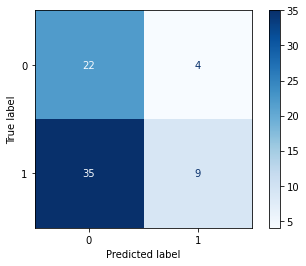

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_nus1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [90]:
test_scaled.groupby('target').count()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34
target,,,,,,,,,,,,,,,,,,,,,
0.0,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
1.0,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


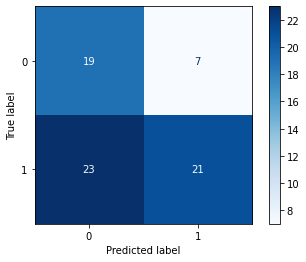

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **Accuracy**

In [92]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
print(knn.score(nus1_X_test, nus1_y_test))

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS!')
print(knn.score(nus1_X_test, nus1_y_test))

NUS1 Data
0.44285714285714284
Without NUS!
0.5714285714285714


In [93]:
f1_score(nus1_y_test, y_pred_nus1, average='macro')

0.42295497780596064

In [94]:
f1_score(nus1_y_test, y_pred_nus1, average='micro')

0.44285714285714284

In [95]:
f1_score(nus1_y_test, y_pred_nus1, average='weighted')

0.3953981338889392

In [96]:
f1_score(nus1_y_test, y_pred_nus1, average=None)

array([0.53012048, 0.31578947])

# **Plot Results**

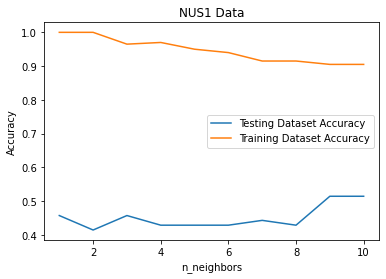

In [97]:
#NUS1 Data
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_X_train, nus1_y_train)
  
  train_accuracy[i] = knn.score(nus1_X_train, nus1_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('NUS1 Data')
plt.show()

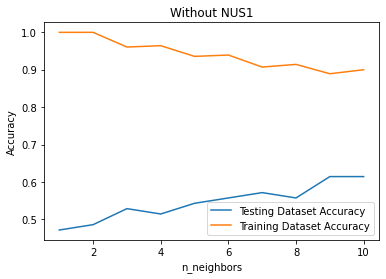

In [98]:
#Original Data (Without NUS1)
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_org_X_train, nus1_org_y_train)
  
  train_accuracy[i] = knn.score(nus1_org_X_train, nus1_org_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Without NUS1')
plt.show()